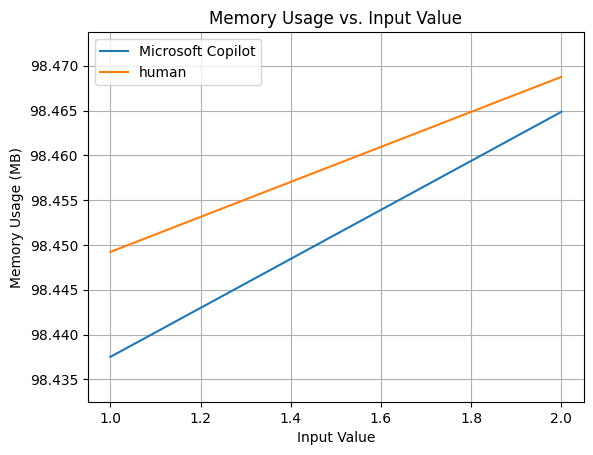

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from memory_profiler import memory_usage
import random
import calendar as cl
import datetime
def weekday_name(number: int) -> str:
    """
    Return a string representing a weekday
    (one of "mon", "tue", "wed", "thu", "fri", "sat", "sun")
    number : an integer in range [0, 6]
        
    >>> weekday_name(3)
    'thu'
    >>> weekday_name(4)
    'fri'
    >>> weekday_name(16)
    """
    week_day={0:"mon",1:"tue",2:"wed",3:"thu",4:"fri",5:"sat",6:"sun"}
    ailable_number=[0,1,2,3,4,5,6]
    if number not in ailable_number:
        return None
    if not isinstance(number, int):
        return None
    return week_day[number]

def weekday(date: str) -> int:
    """
    Return an integer representing a weekday
    (0 represents monday and so on)
    Read about algorithm as Zeller's Congruence
    date : a string of form "day.month.year
    if the date is invalid raises AssertionError 
    with corresponding message
                                                
    >>> weekday("12.08.2015")
    2
    >>> weekday("28.02.2016")
    6
    """
    try:
        day, month, year = map(int, date.split('.'))
        datetime_instance = datetime.datetime(year, month, day)
        day_of_the_week = datetime_instance.weekday()
        return day_of_the_week
    except ValueError:
        return None

def calen(month_: int, year_: int) -> str:
    """Return a string representing a\
    horizontal calendar for the given month and year.

    month : an integer in range [1 , 12]
    year : an integer (strictly speaking the algorithm in weekday
    works correctly only for Gregorian calendar, so year must
    be greater than 1583)
    when arguments are invalid raises AssertionError with corresponding
    message

    >>> print(calendar(8 , 2015))
    mon tue wed thu fri sat sun
                          1   2
      3   4   5   6   7   8   9
     10  11  12  13  14  15  16
     17  18  19  20  21  22  23
     24  25  26  27  28  29  30
     31
    """
    formatted_month = cl.month(year_, month_, w=3)
    formatted_month=formatted_month.lower()
    formatted_month_lst=formatted_month.split("\n")
    formatted_month_lst.pop(0)
    fgh="\n".join(formatted_month_lst)
    portu=fgh.rstrip()
    return portu

def transform_calendar1(calendar):
    """Transforms a calendar string into a specific format."""
    formatted_month_lst = [
        line for line in calendar.split("\n")[1:] if line.strip() != ''
    ]
    days = ["mon", "tue", "wed", "thu", "fri", "sat", "sun"]
    day_lists = {day: [day] for day in days}

    # Create a list of the days in the first week
    first_week = [char for char in formatted_month_lst[0] if char.isdigit()]
    first_week = [" "] * (7 - len(first_week)) + first_week

    for i, day in enumerate(days):
        day_lists[day].append(first_week[i])

    formatted_month_lst = formatted_month_lst[1:]
    last_row = formatted_month_lst[-1].split()
    formatted_month_lst = formatted_month_lst[:-1]
    nested_lists = [list(map(int, s.split())) for s in formatted_month_lst]

    for week in nested_lists:
        for i, day in enumerate(days):
            day_lists[day].append(week[i] if i < len(week) else " ")

    for i, day in enumerate(days):
        day_lists[day].append(last_row[i] if i < len(last_row) else " ")

    weekday_cal = [day_lists[day] for day in days]
    calendar_str = '\n'.join(
        ' '.join(map(str, day)).rstrip() for day in weekday_cal
    )
    return calendar_str


def transform_calendar2(calendar: str) -> str:
    # formatted_month = c.formatmonth(year, month)
    formatted_month_lst = calendar.split("\n")
    formatted_month_lst = formatted_month_lst[1:]
    formatted_month_lst = [line for line in formatted_month_lst if line.strip() != '']
    mon_l = ["mon"]
    tue_l = ["tue"]
    wed_l = ["wed"]
    thu_l = ["thu"]
    fri_l = ["fri"]
    sat_l = ["sat"]
    sun_l = ["sun"]
    fhg=[]
    for _ in formatted_month_lst[0]:
        for ee in _:
            if ee.isdigit():
                fhg.append(ee)
    if len(fhg)==1:
        mon_l.append(" ")
        tue_l.append(" ")
        wed_l.append(" ")
        thu_l.append(" ")
        fri_l.append(" ")
        sat_l.append(" ")
        sun_l.append(fhg[0])
        fhg=[]
    if len(fhg)==2:
        mon_l.append(" ")
        tue_l.append(" ")
        wed_l.append(" ")
        thu_l.append(" ")
        fri_l.append(" ")
        sat_l.append(fhg[0])
        sun_l.append(fhg[1])
        fhg=[]
    elif len(fhg)==3:
        mon_l.append(" ")
        tue_l.append(" ")
        wed_l.append(" ")
        thu_l.append(" ")
        fri_l.append(fhg[0])
        sat_l.append(fhg[0])
        sun_l.append(fhg[1])
        fhg=[]
    elif len(fhg)==4:
        mon_l.append(" ")
        tue_l.append(" ")
        wed_l.append(" ")
        thu_l.append(fhg[0])
        fri_l.append(fhg[1])
        sat_l.append(fhg[2])
        sun_l.append(fhg[3])
        fhg=[]
    elif len(fhg)==5:
        mon_l.append(" ")
        tue_l.append(" ")
        wed_l.append(fhg[0])
        thu_l.append(fhg[1])
        fri_l.append(fhg[2])
        sat_l.append(fhg[3])
        sun_l.append(fhg[4])
        fhg=[]
    elif len(fhg)==6:
        mon_l.append(" ")
        tue_l.append(fhg[0])
        wed_l.append(fhg[1])
        thu_l.append(fhg[2])
        fri_l.append(fhg[3])
        sat_l.append(fhg[4])
        sun_l.append(fhg[5])
        fhg=[]
    elif len(fhg)==7:
        mon_l.append(fhg[0])
        tue_l.append(fhg[1])
        wed_l.append(fhg[2])
        thu_l.append(fhg[3])
        fri_l.append(fhg[4])
        sat_l.append(fhg[5])
        sun_l.append(fhg[6])
        fhg=[]
    formatted_month_lst.remove(formatted_month_lst[0])
    last_row=formatted_month_lst[-1]
    last_row = last_row.split()
    # print(last_row)
    formatted_month_lst.remove(formatted_month_lst[-1])
    nested_lists = [list(map(int, s.split())) for s in formatted_month_lst]
    # print(nested_lists)
    index_mon_list=1
    while index_mon_list <= len(nested_lists):
        nested_lists[index_mon_list-1]
        for i, day in enumerate(nested_lists[index_mon_list-1]):
            if i == 0:
                mon_l.append(day)
            elif i == 1:
                tue_l.append(day)
            elif i == 2:
                wed_l.append(day)
            elif i == 3:
                thu_l.append(day)
            elif i == 4:
                fri_l.append(day)
            elif i == 5:
                sat_l.append(day)
            elif i == 6:
                sun_l.append(day)
        index_mon_list+=1
    # print(last_row)
    # print(formatted_month_lst)
    #а тепер для останнього числа
    if len(last_row)==1:
        mon_l.append(last_row[0])
    elif len(last_row)==2:
        mon_l.append(last_row[0])
        tue_l.append(last_row[1])
    elif len(last_row)==3:
        mon_l.append(last_row[0])
        tue_l.append(last_row[1])
        wed_l.append(last_row[2])
    elif len(last_row)==4:
        mon_l.append(last_row[0])
        tue_l.append(last_row[1])
        wed_l.append(last_row[2])
        thu_l.append(last_row[3])
    elif len(last_row)==5:
        mon_l.append(last_row[0])
        tue_l.append(last_row[1])
        wed_l.append(last_row[2])
        thu_l.append(last_row[3])
        fri_l.append(last_row[4])
    elif len(last_row)==6:
        mon_l.append(last_row[0])
        tue_l.append(last_row[1])
        wed_l.append(last_row[2])
        thu_l.append(last_row[3])
        fri_l.append(last_row[4])
        sat_l.append(last_row[5])
    elif len(last_row)==7:
        mon_l.append(last_row[0])
        tue_l.append(last_row[1])
        wed_l.append(last_row[2])
        thu_l.append(last_row[3])
        fri_l.append(last_row[4])
        sat_l.append(last_row[5])
        sun_l.append(last_row[6])
    # print(mon_l, tue_l, wed_l, thu_l, fri_l, sat_l, sun_l)
    weekday_cal=[mon_l,tue_l,wed_l,thu_l,fri_l,sat_l,sun_l]
    calendar_str = '\n'.join(' '.join(map(str, day)) for day in weekday_cal)
    return calendar_str


def memory_test():

    # Memory usage container for each input value
    mem_usages_1 = []
    mem_usages_2 = []
    test_sizes = []
    # Measure memory usage for each input value
    for m in range(1, 3):
        test_sizes.append(m)
        mem_usage = memory_usage((transform_calendar1, (calen(m%10 + 1, 2000 + m*10),), {}))
        mem_usages_1.append(mem_usage[-1])  # Take the maximum memory usage from the list
        mem_usage = memory_usage((transform_calendar2, (calen(m%10 + 1, 2000 + m*10),), {}))
        mem_usages_2.append(mem_usage[-1])  # Take the maximum memory usage from the list

    # Plot the results
    plt.plot(test_sizes, mem_usages_1, label = 'Microsoft Copilot')
    plt.plot(test_sizes, mem_usages_2, label = 'human')
    plt.title('Memory Usage vs. Input Value')
    plt.xlabel('Input Value')
    plt.ylabel('Memory Usage (MB)')
    plt.ylim(min(mem_usages_1+mem_usages_2) - 0.005, max(mem_usages_1+mem_usages_2) + 0.005)
    plt.grid(True)
    plt.legend()
    plt.show()

if __name__ == '__main__':    
    memory_test()